<h3> Import most important libraries <h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, f_oneway, kruskal, mannwhitneyu
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [21]:
# import file
# we can import data about EDC3, HSP104, Pab1 and Lipid droplets (LD)
file_name = 'data/HSP104.xlsx'
# read the data
data = pd.read_excel(file_name)

In [22]:
# visualize structure of data
data.head(10)


,Nazwa,"Ilosc kom,","Ilosc kom, fluo",Proba,lp,photo area,Intensywnosc swiecenia,Unnamed: 7,Unnamed: 8
0,By,21,18,1,1,5002624,1.581,0.0,243.0
1,By,20,16,1,2,5002624,1.016,0.0,241.0
2,By,25,18,1,3,5002624,2.644,0.0,243.0
3,By,18,15,1,4,5002624,0.966,0.0,240.0
4,By,16,16,1,5,5002624,1.147,0.0,241.0
5,By,14,16,1,6,5002624,0.822,0.0,241.0
6,By,23,21,1,7,5002624,1.320,0.0,244.0
7,By,15,14,1,8,5002624,1.080,0.0,239.0
8,By,16,15,1,9,5002624,0.922,0.0,240.0
9,By,24,22,1,10,5002624,1.386,0.0,245.0


In [23]:
name_of_yeasts = ['By', 'VPS[-]', 'vps tef', 'vps mut', 'VK[-]', 'vk tef', 'vk mut']
mean_dict = {}
for name in name_of_yeasts:
    sum_of_density = 0
    number_of_elements = 0
    for i in range(len(data)):
        if name == data['Nazwa'][i]:
            sum_of_density += data["Intensywnosc swiecenia"][i]
            number_of_elements += 1
    mean_dict[name] = sum_of_density/number_of_elements
print(mean_dict)

data['mean'] = data['Nazwa'].map(mean_dict)
grouped_data = data.groupby('Nazwa')['Intensywnosc swiecenia'].std().reset_index()
data = pd.merge(data, grouped_data, how='left', left_on='Nazwa', right_on='Nazwa')
data = data.rename(columns={'Intensywnosc swiecenia_y': 'standard_deviation'})

data['standarized_density'] = (data['Intensywnosc swiecenia_x'] - data['mean']) / data['standard_deviation']



{'By': 1.1198823529411766, 'VPS[-]': 1.0124545454545453, 'vps tef': 1.0394117647058825, 'vps mut': 1.3364999999999996, 'VK[-]': 0.9140294117647061, 'vk tef': 0.6063529411764708, 'vk mut': 0.34855882352941175}


In [24]:
data.head(10)

,Nazwa,"Ilosc kom,","Ilosc kom, fluo",Proba,lp,photo area,Intensywnosc swiecenia_x,Unnamed: 7,Unnamed: 8,mean,standard_deviation,standarized_density
0,By,21,18,1,1,5002624,1.581,0.0,243.0,1.119882,0.456506,1.010103
1,By,20,16,1,2,5002624,1.016,0.0,241.0,1.119882,0.456506,-0.227560
2,By,25,18,1,3,5002624,2.644,0.0,243.0,1.119882,0.456506,3.338661
3,By,18,15,1,4,5002624,0.966,0.0,240.0,1.119882,0.456506,-0.337088
4,By,16,16,1,5,5002624,1.147,0.0,241.0,1.119882,0.456506,0.059403
5,By,14,16,1,6,5002624,0.822,0.0,241.0,1.119882,0.456506,-0.652527
6,By,23,21,1,7,5002624,1.320,0.0,244.0,1.119882,0.456506,0.438368
7,By,15,14,1,8,5002624,1.080,0.0,239.0,1.119882,0.456506,-0.087364
8,By,16,15,1,9,5002624,0.922,0.0,240.0,1.119882,0.456506,-0.433472
9,By,24,22,1,10,5002624,1.386,0.0,245.0,1.119882,0.456506,0.582945


Statystyka testowa: 0.9655035138130188, P-value: 1.691986653895583e-05
Dane nie mają rozkładu normalnego.


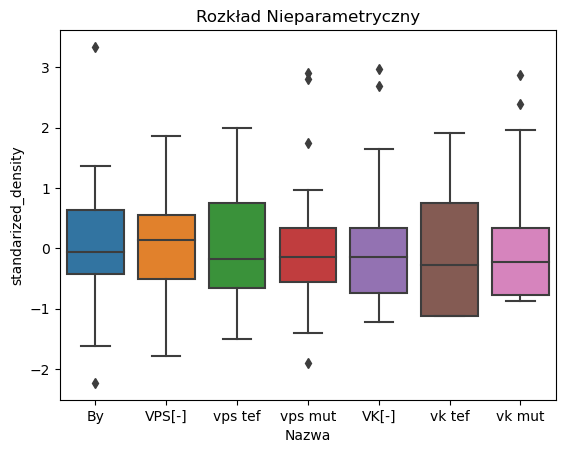

Test Kruskala-Wallisa: Statystyka testowa: 58.694988815911884, P-value: 8.283847808340433e-11
Test Mann-Whitney dla By i VPS[-]: Statystyka testowa: 617.5, P-value: 0.4824825855215845
Test Mann-Whitney dla By i vps tef: Statystyka testowa: 639.0, P-value: 0.45803447508606987
Test Mann-Whitney dla By i vps mut: Statystyka testowa: 459.0, P-value: 0.14608612737680668
Test Mann-Whitney dla By i VK[-]: Statystyka testowa: 753.0, P-value: 0.032327369655944745
Test Mann-Whitney dla By i vk tef: Statystyka testowa: 874.0, P-value: 0.00028313446203507973
Test Mann-Whitney dla By i vk mut: Statystyka testowa: 1033.5, P-value: 2.332173600099969e-08
Test Mann-Whitney dla VPS[-] i vps tef: Statystyka testowa: 569.5, P-value: 0.9200809511027835
Test Mann-Whitney dla VPS[-] i vps mut: Statystyka testowa: 409.0, P-value: 0.05742885048956446
Test Mann-Whitney dla VPS[-] i VK[-]: Statystyka testowa: 663.5, P-value: 0.20082062960966962
Test Mann-Whitney dla VPS[-] i vk tef: Statystyka testowa: 792.0, P-

In [25]:
alpha = 0.05
stat, p_value = shapiro(data['standarized_density'])
print(f'Statystyka testowa: {stat}, P-value: {p_value}')

if p_value > alpha:
    print("Dane mają rozkład normalny.")
    # Wykres rozkładu normalnego
    sns.histplot(data['standarized_density'], kde=True)
    plt.title('Rozkład Normalny po Standaryzacji')
    plt.show()

    # Test ANOVA (parametryczny)
    wyniki_anova = f_oneway(
        data['standarized_density'][data['Nazwa'] == 'By'],
        data['standarized_density'][data['Nazwa'] == 'VPS[-]'],
        data['standarized_density'][data['Nazwa'] == 'vps tef'],
        data['standarized_density'][data['Nazwa'] == 'vps mut'],
        data['standarized_density'][data['Nazwa'] == 'VK[-]'],
        data['standarized_density'][data['Nazwa'] == 'vk tef'],
        data['standarized_density'][data['Nazwa'] == 'vk mut'],
    )

    print(f'Test ANOVA: Statystyka testowa: {wyniki_anova.statistic}, P-value: {wyniki_anova.pvalue}')

    if wyniki_anova.pvalue < alpha:
        # Wykonaj testy post hoc (Tukey HSD)
        tukey_results = pairwise_tukeyhsd(data['standarized_density'], data['Nazwa'])
        print(tukey_results)

        # Wykres pudełkowy z oznaczeniem istotnych różnic
        sns.boxplot(x='Nazwa', y='standarized_density', data=data)
        plt.title('Rozkład Intensywności Świecenia z Oznaczeniem Różnic Istotnych')
        plt.show()
    else:
        print("Brak istotnych różnic między grupami.")

else:
    print("Dane nie mają rozkładu normalnego.")
    # Wykres rozkładu nieparametrycznego
    sns.boxplot(x='Nazwa', y='standarized_density', data=data)
    plt.title('Rozkład Nieparametryczny')
    plt.show()
    median_dict = {}
    for name in name_of_yeasts:
        median_dict[name] = data.loc[data['Nazwa'] == name, 'Intensywnosc swiecenia_x'].median()

    data['median'] = data['Nazwa'].map(median_dict)

    # Test Kruskala-Wallisa
    stat, p_value = kruskal(
        data.loc[data['Nazwa'] == 'By', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'VPS[-]', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'vps tef', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'vps mut', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'VK[-]', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'vk tef', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'vk mut', 'Intensywnosc swiecenia_x'],
    )

    if p_value < alpha:
        print(f'Test Kruskala-Wallisa: Statystyka testowa: {stat}, P-value: {p_value}')

        # Wykonaj testy porównawcze (Mann-Whitney)
        for i in range(len(name_of_yeasts)):
            for j in range(i + 1, len(name_of_yeasts)):
                group1 = data['Intensywnosc swiecenia_x'][data['Nazwa'] == name_of_yeasts[i]]
                group2 = data['Intensywnosc swiecenia_x'][data['Nazwa'] == name_of_yeasts[j]]
                stat, p_value = mannwhitneyu(group1, group2)
                print(f'Test Mann-Whitney dla {name_of_yeasts[i]} i {name_of_yeasts[j]}: Statystyka testowa: {stat}, P-value: {p_value}')



